## Data Analysis On Walmart

- ANALYSIS 

## Installing Packages and Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Step 1: Download the dataset

In [ ]:
# Extrating Raw Data for Walmart
csv_file_path = '../Final_project/Resources/Walmart.csv'
df = pd.read_csv(csv_file_path)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Check for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# extract year, month, and day from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [6]:
df['Week'] = df['Date'].dt.isocalendar().week

### Data Visualization 

/Users/taylorhipkins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/taylorhipkins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/taylorhipkins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


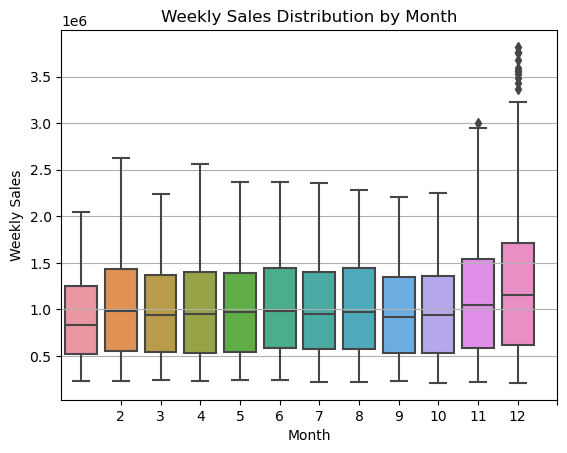

In [8]:
# Plot box plot
sns.boxplot(x='Month', y='Weekly_Sales', data=df)
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution by Month')
plt.xticks(range(1, 13))
plt.grid(axis='y')

# Set the background color of the figure to be transparent
plt.gcf().set_facecolor('none')

# Save the figure as a PNG image with a transparent background
plt.savefig('weekly_sales_boxplot.png', transparent=True)

plt.show()

In [9]:
# Create a Histogram to show the distribution of the data for 
# Weekly Sales, "Temperature", "Fuel Price", and "Unemployment"

columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']
plt.figure(figsize=(30,30))
for i,col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = 15, color='#0071CE', edgecolor='#BB8FCE')
    # Save the figure as a PNG image with a transparent background
    plt.savefig(f'{col}_histogram.png', transparent=True)
    plt.clf()
plt.close()
plt.show()

/Users/taylorhipkins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/taylorhipkins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/taylorhipkins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/taylorhipkins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

In [10]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
figure = px.scatter(
    data_frame=df,
    x="Weekly_Sales",
    y="Month",
    color="Year",
    size="Weekly_Sales",  # Specify the column you want to use for size
    trendline="ols"
)
# Save the figure as a PNG image with a transparent background
figure.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
pio.write_image(figure, 'monthly_sales_scatter_plot.png')
figure.show()

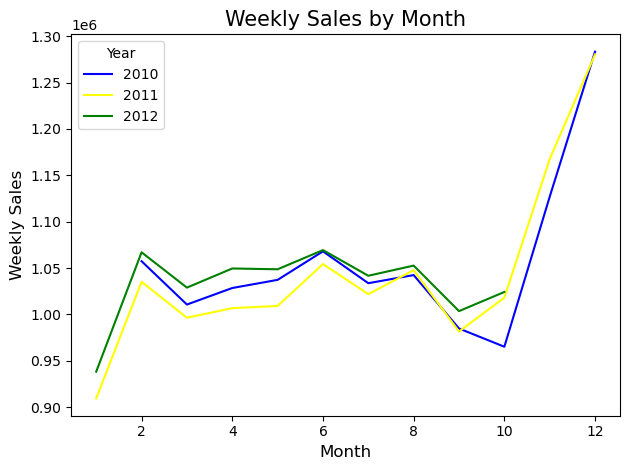

In [11]:
# Calculate monthly sales pivot table
monthly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="Year", index="Month")

# Plot the pivot table with custom colors
monthly_sales.plot(color=['blue', 'yellow', 'green'])

plt.xlabel('Month', fontname="sans-serif", fontsize=12)
plt.ylabel('Weekly Sales', fontname="sans-serif", fontsize=12)
plt.title('Weekly Sales by Month', fontname="sans-serif", fontsize=15)

plt.xticks(fontname="sans-serif", fontsize=10)
plt.yticks(fontname="sans-serif", fontsize=10)
plt.tight_layout()

# Get the current figure and save it with a transparent background
fig = plt.gcf()
fig.savefig('weekly_sales_by_month_pivot_plot.png', transparent=True)

plt.show()

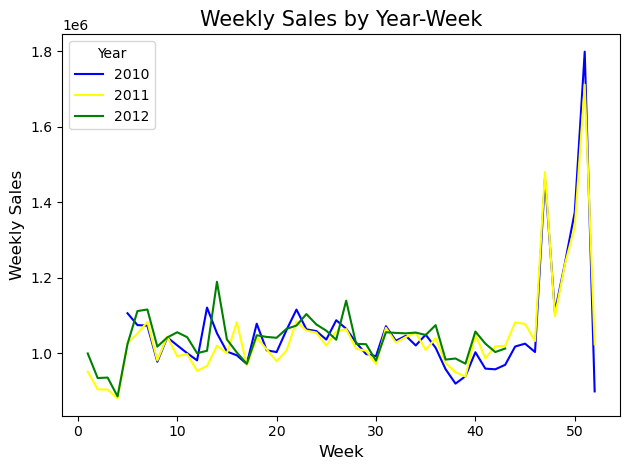

In [12]:
# Calculate weekly sales pivot table
weekly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="Year", index="Week")

# Plot the pivot table with custom colors
weekly_sales.plot(color=['blue', 'yellow', 'green'])

plt.xlabel('Week', fontname="sans-serif", fontsize=12)
plt.ylabel('Weekly Sales', fontname="sans-serif", fontsize=12)
plt.title('Weekly Sales by Year-Week', fontname="sans-serif", fontsize=15)

plt.xticks(fontname="sans-serif", fontsize=10)
plt.yticks(fontname="sans-serif", fontsize=10)
plt.tight_layout()


# Save the figure as a PNG image with a transparent background
fig = plt.gcf()
plt.savefig('weekly_sales_pivot_plot.png', transparent=True)
plt.show()

/Users/taylorhipkins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/taylorhipkins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/taylorhipkins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



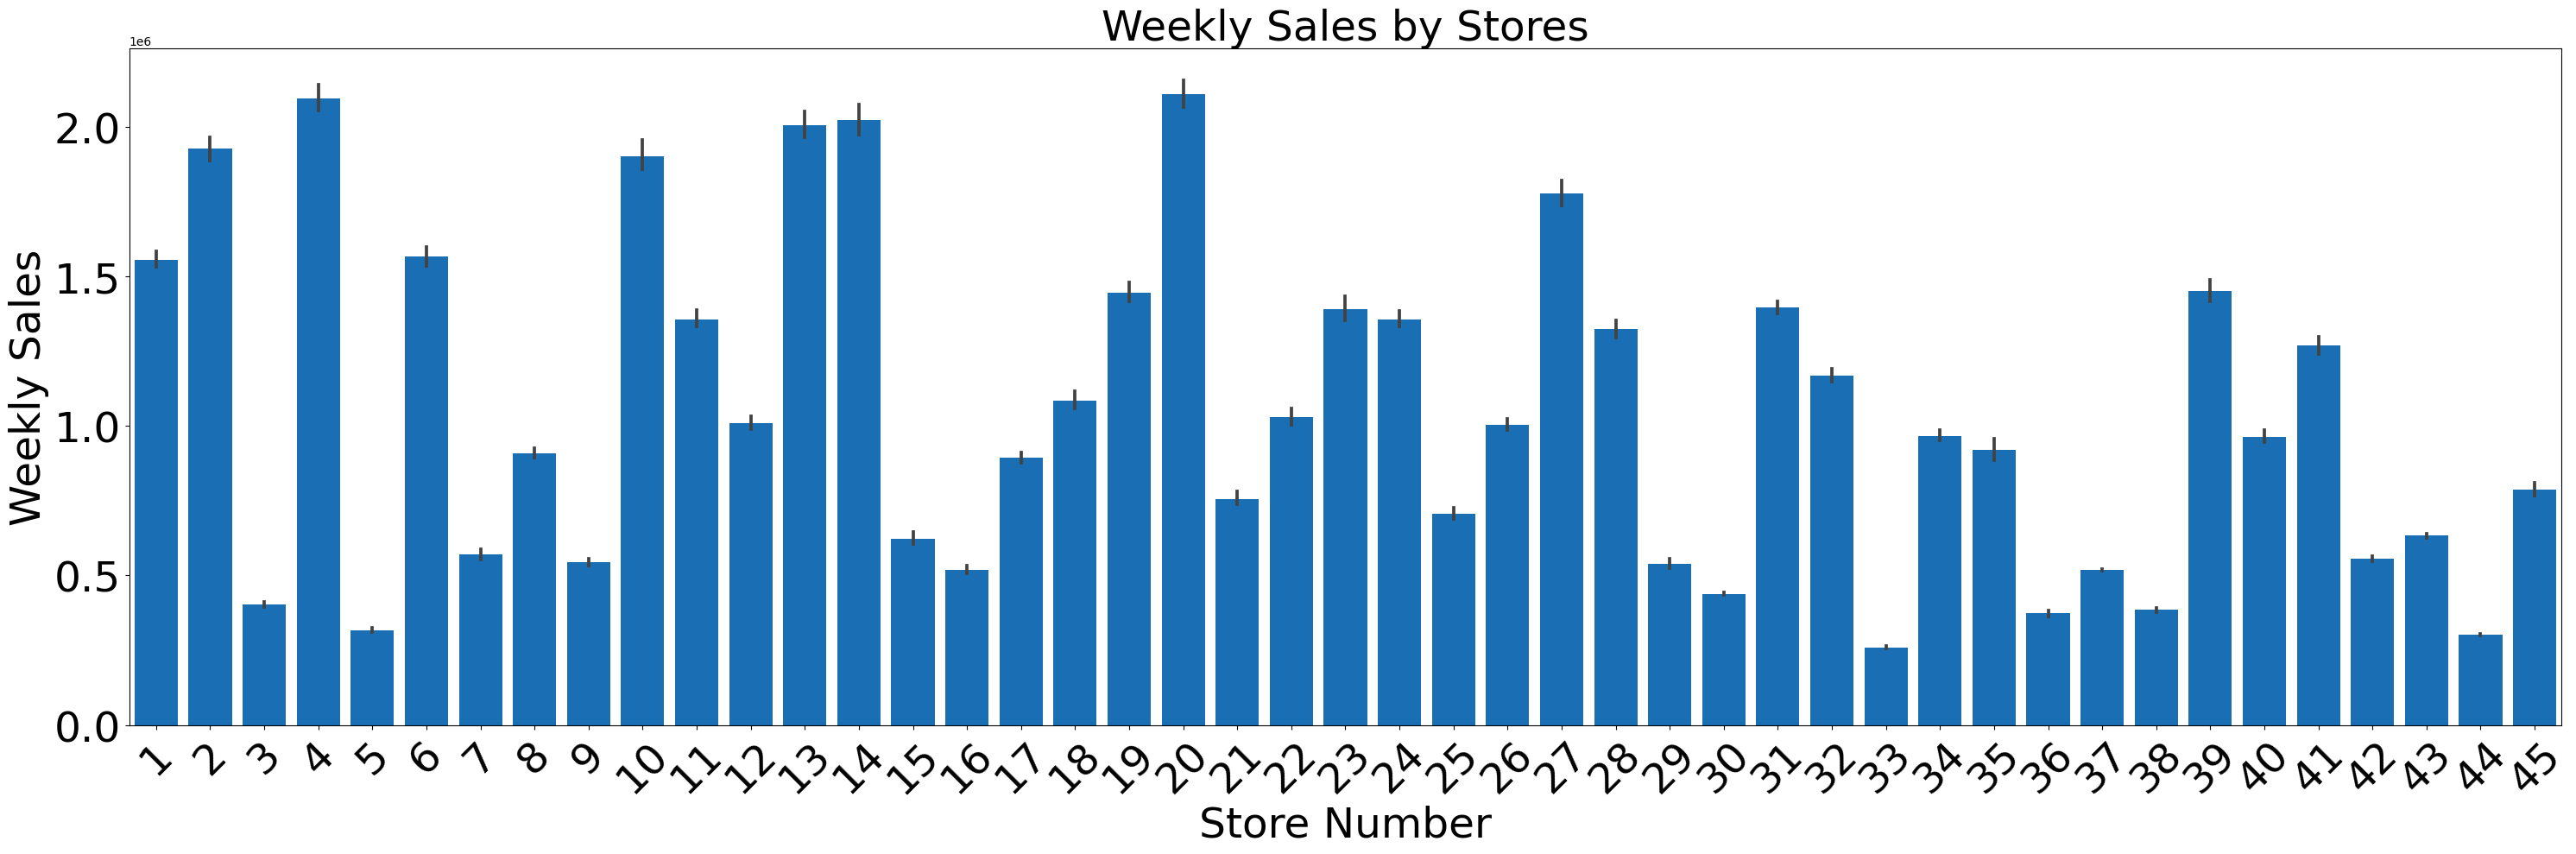

In [13]:

plt.figure(figsize=(30, 10))
fig = sns.barplot(x='Store', y='Weekly_Sales', color='#0071CE', data=df)

plt.xlabel('Store Number', fontname="sans-serif", fontsize=35)
plt.ylabel('Weekly Sales', fontname="sans-serif", fontsize=35)
plt.title('Weekly Sales by Stores', fontname="sans-serif", fontsize=35)

plt.xticks(rotation=45, fontname="sans-serif", fontsize=35)
plt.yticks(fontname="sans-serif", fontsize=35)
plt.tight_layout()
fig.patch.set_facecolor('none')
# Save the figure as a PNG image with a transparent background
plt.savefig('weekly_sales_bar_plot.png', transparent=True)
plt.show()



In [17]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

# Create an interactive line plot of Weekly Sales vs. Month using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_sales.index,
                         y=monthly_sales.values,
                         mode='lines+markers',
                         name='Weekly Sales'))

fig.update_layout(title='Weekly Sales vs. Month',
                  xaxis_title='Month',
                  yaxis_title='Average Weekly Sales',
                  xaxis=dict(tickmode='array',
                             tickvals=list(range(1, 13)),
                             ticktext=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))

# Save the figure as a PNG image with a transparent background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
pio.write_image(fig, 'weekly sales plot.png')

### Machine Learning Models

In [19]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Year               3
Month             12
Day               31
Week              52
dtype: int64

In [20]:
df2 = pd.get_dummies(df, dtype=int)
df2

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,5,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,12,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,42


In [21]:
y = df['Holiday_Flag']
X = df[['Weekly_Sales', 'Store', 'Unemployment',
       'Fuel_Price', 'CPI', 'Week', 'Temperature', 'Month', 'Year']]
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [22]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=9))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
151/151 [==============================] - 1s 960us/step - loss: 0.3589 - accuracy: 0.9082
Epoch 2/50
151/151 [==============================] - 0s 846us/step - loss: 0.2460 - accuracy: 0.9302
Epoch 3/50
151/151 [==============================] - 0s 798us/step - loss: 0.2363 - accuracy: 0.9302
Epoch 4/50
151/151 [==============================] - 0s 806us/step - loss: 0.2322 - accuracy: 0.9302
Epoch 5/50
151/151 [==============================] - 0s 821us/step - loss: 0.2297 - accuracy: 0.9302
Epoch 6/50
151/151 [==============================] - 0s 837us/step - loss: 0.2280 - accuracy: 0.9302
Epoch 7/50
151/151 [==============================] - 0s 834us/step - loss: 0.2263 - accuracy: 0.9302
Epoch 8/50
151/151 [==============================] - 0s 791us/step - loss: 0.2250 - accuracy: 0.9302
Epoch 9/50
151/151 [==============================] - 0s 798us/step - loss: 0.2239 - accuracy: 0.9302
Epoch 10/50
151/151 [==============================] - 0s 1ms/step - loss: 0.2237 

In [24]:
y = df['Holiday_Flag']
X = df[['Store', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Week']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [26]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [27]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.sample(25)

,Prediction,Actual
776,0,0
1408,0,1
934,0,0
381,0,0
882,0,0
999,0,0
1113,0,0
595,0,0
1509,0,0
891,0,0


In [28]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1496    0]
 [ 113    0]]


In [29]:
# Print the classification report for the model
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1496
           1       0.00      0.00      0.00       113

    accuracy                           0.93      1609
   macro avg       0.46      0.50      0.48      1609
weighted avg       0.86      0.93      0.90      1609



/Users/taylorhipkins/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/taylorhipkins/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/taylorhipkins/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [30]:
# Calculate total weekly sales for holiday and non-holiday weeks
total_sales_holiday = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
total_sales_non_holiday = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].sum()

# Create a DataFrame for the pie chart
pie_data = pd.DataFrame({'Holiday_Flag': ['Holiday', 'Non-Holiday'],
                         'Total_Weekly_Sales': [total_sales_holiday, total_sales_non_holiday]})

color_palette = ['#0071CE', '#FFD166']
# Create the interactive pie chart using Plotly
fig = px.pie(pie_data, values='Total_Weekly_Sales', names='Holiday_Flag',
             title='Proportion of Total Weekly Sales by Holiday Flag',
             color_discrete_sequence=color_palette)
fig.show()


 #Save the figure as a PNG image with a transparent background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
pio.write_image(fig, 'total_weekly_sales_pie_chart_by_total_sales.png')

In [40]:
# Calculate total weekly sales for holiday and non-holiday weeks
total_sales_holiday = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
total_sales_non_holiday = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

# Create a DataFrame for the pie chart
pie_data = pd.DataFrame({'Holiday_Flag': ['Holiday', 'Non-Holiday'],
                         'Total_Weekly_Sales': [total_sales_holiday, total_sales_non_holiday]})

color_palette = ['#0071CE', '#FFD166']
# Create the interactive pie chart using Plotly
fig = px.pie(pie_data, values='Total_Weekly_Sales', names='Holiday_Flag',
             title='Proportion of Average Total Weekly Sales by Holiday Flag',
             color_discrete_sequence=color_palette)
fig.show()
# Save the figure as a PNG image with a transparent background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
pio.write_image(fig, 'total_weekly_sales_pie_chart_by_mean_sales.png')

In [32]:
y = df['Weekly_Sales']
X = df[['Store', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Week']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Create Model
model = LinearRegression()

In [34]:
# Fit the Model
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Prediction 
predictions = model.predict(X_test)
predictions

array([1162156.92272994, 1090740.12562434, 1300301.65727919, ...,
        667529.82617825, 1253237.71425158, 1276281.06809006])

In [36]:
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

Mean Squared Error: 272049348139.45178
Mean Absolute Error: 432594.9768878016
R-squared: 0.15553160499602892


In [37]:
# Feature selection
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']

# Split data into features and target
X = df[features]
y = df['Weekly_Sales']

In [38]:
# Split data into training and testing sets for the transformed target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Build a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'R2 Score (Random Forest): {r2_rf}')
print(f'RMSE (Random Forest): {rmse_rf}')

R2 Score (Random Forest): 0.958079819067563
RMSE (Random Forest): 116210.05824650699


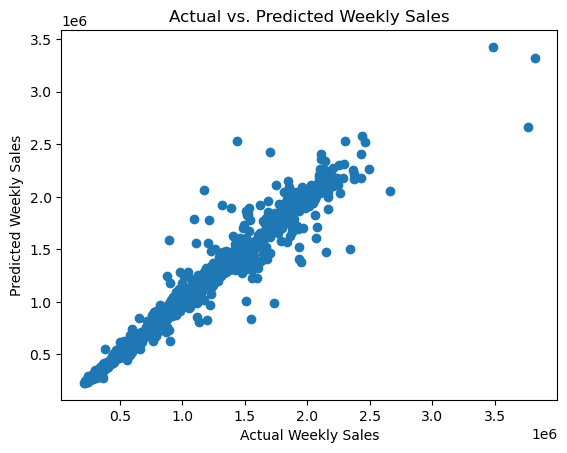

In [59]:
# Plot actual vs. predicted values
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs. Predicted Weekly Sales')

# Display the plot
plt.show()

# Create a new figure
fig = plt.figure()

# Save the figure as a PNG image with a transparent background
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs. Predicted Weekly Sales')
fig.savefig('actual_vs_predicted_transparent_background.png', transparent=True)

plt.close(fig)

### Data Pre-processing

In [45]:
data_copy = df.copy()

In [46]:
data_copy.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int32
Month                    int32
Day                      int32
Week                    UInt32
dtype: object

In [47]:
def get_season(quarter):

    '''this function is to get season according to quarter column'''

    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Autumn'

In [48]:
# correct data format of the 'date' column
data_copy['date'] = pd.to_datetime(data_copy['Date'], format = "%d-%m-%Y")

# Create a new column "year" containing the year
data_copy['year'] = data_copy['Date'].dt.year

# Create a new column "quarter" containing the season number
data_copy['quarter'] = data_copy['Date'].dt.quarter

# Create a new column "season" containing the season
data_copy['season'] = data_copy['quarter'].apply(get_season)

# Create a new column "month" containing the month number
data_copy['month'] = data_copy['Date'].dt.month

# Create a new column "month_name" containing the month names
data_copy['month_name'] = data_copy['Date'].dt.month_name()

# Create a new column "week" containing the week number
data_copy['week'] = data_copy['Date'].dt.isocalendar().week

# Create a new column "day_of_week" containing the day names
data_copy['day_of_week'] = data_copy['Date'].dt.day_name()

In [49]:
# display a data sample
data_copy.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Week,date,year,quarter,season,month,month_name,week,day_of_week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5,2010-02-05,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,6,2010-02-12,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,7,2010-02-19,2010,1,Winter,2,February,7,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,8,2010-02-26,2010,1,Winter,2,February,8,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,9,2010-03-05,2010,1,Winter,3,March,9,Friday


In [50]:
# Check the data types 
data_copy.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int32
Month                    int32
Day                      int32
Week                    UInt32
date            datetime64[ns]
year                     int32
quarter                  int32
season                  object
month                    int32
month_name              object
week                    UInt32
day_of_week             object
dtype: object

In [51]:
# Drop the unwanted columns from dataframe
data_copy.drop(['date','year', 'quarter', 'month','Day', 'day_of_week'], axis = 1, inplace = True)

In [52]:
# dataFrame after dropping the colummns
data_copy.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int32
Month                    int32
Week                    UInt32
season                  object
month_name              object
week                    UInt32
dtype: object

In [53]:
#  Convert store and holiday and week columns into categorical features(objects)

data_copy['Store'] = data_copy['Store'].astype('object')
data_copy['Holiday_Flag'] = data_copy['Holiday_Flag'].astype('object')
data_copy['week'] = data_copy['week'].astype('object')

In [54]:
# Check the data types after convert
data_copy.dtypes

Store                   object
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag            object
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int32
Month                    int32
Week                    UInt32
season                  object
month_name              object
week                    object
dtype: object

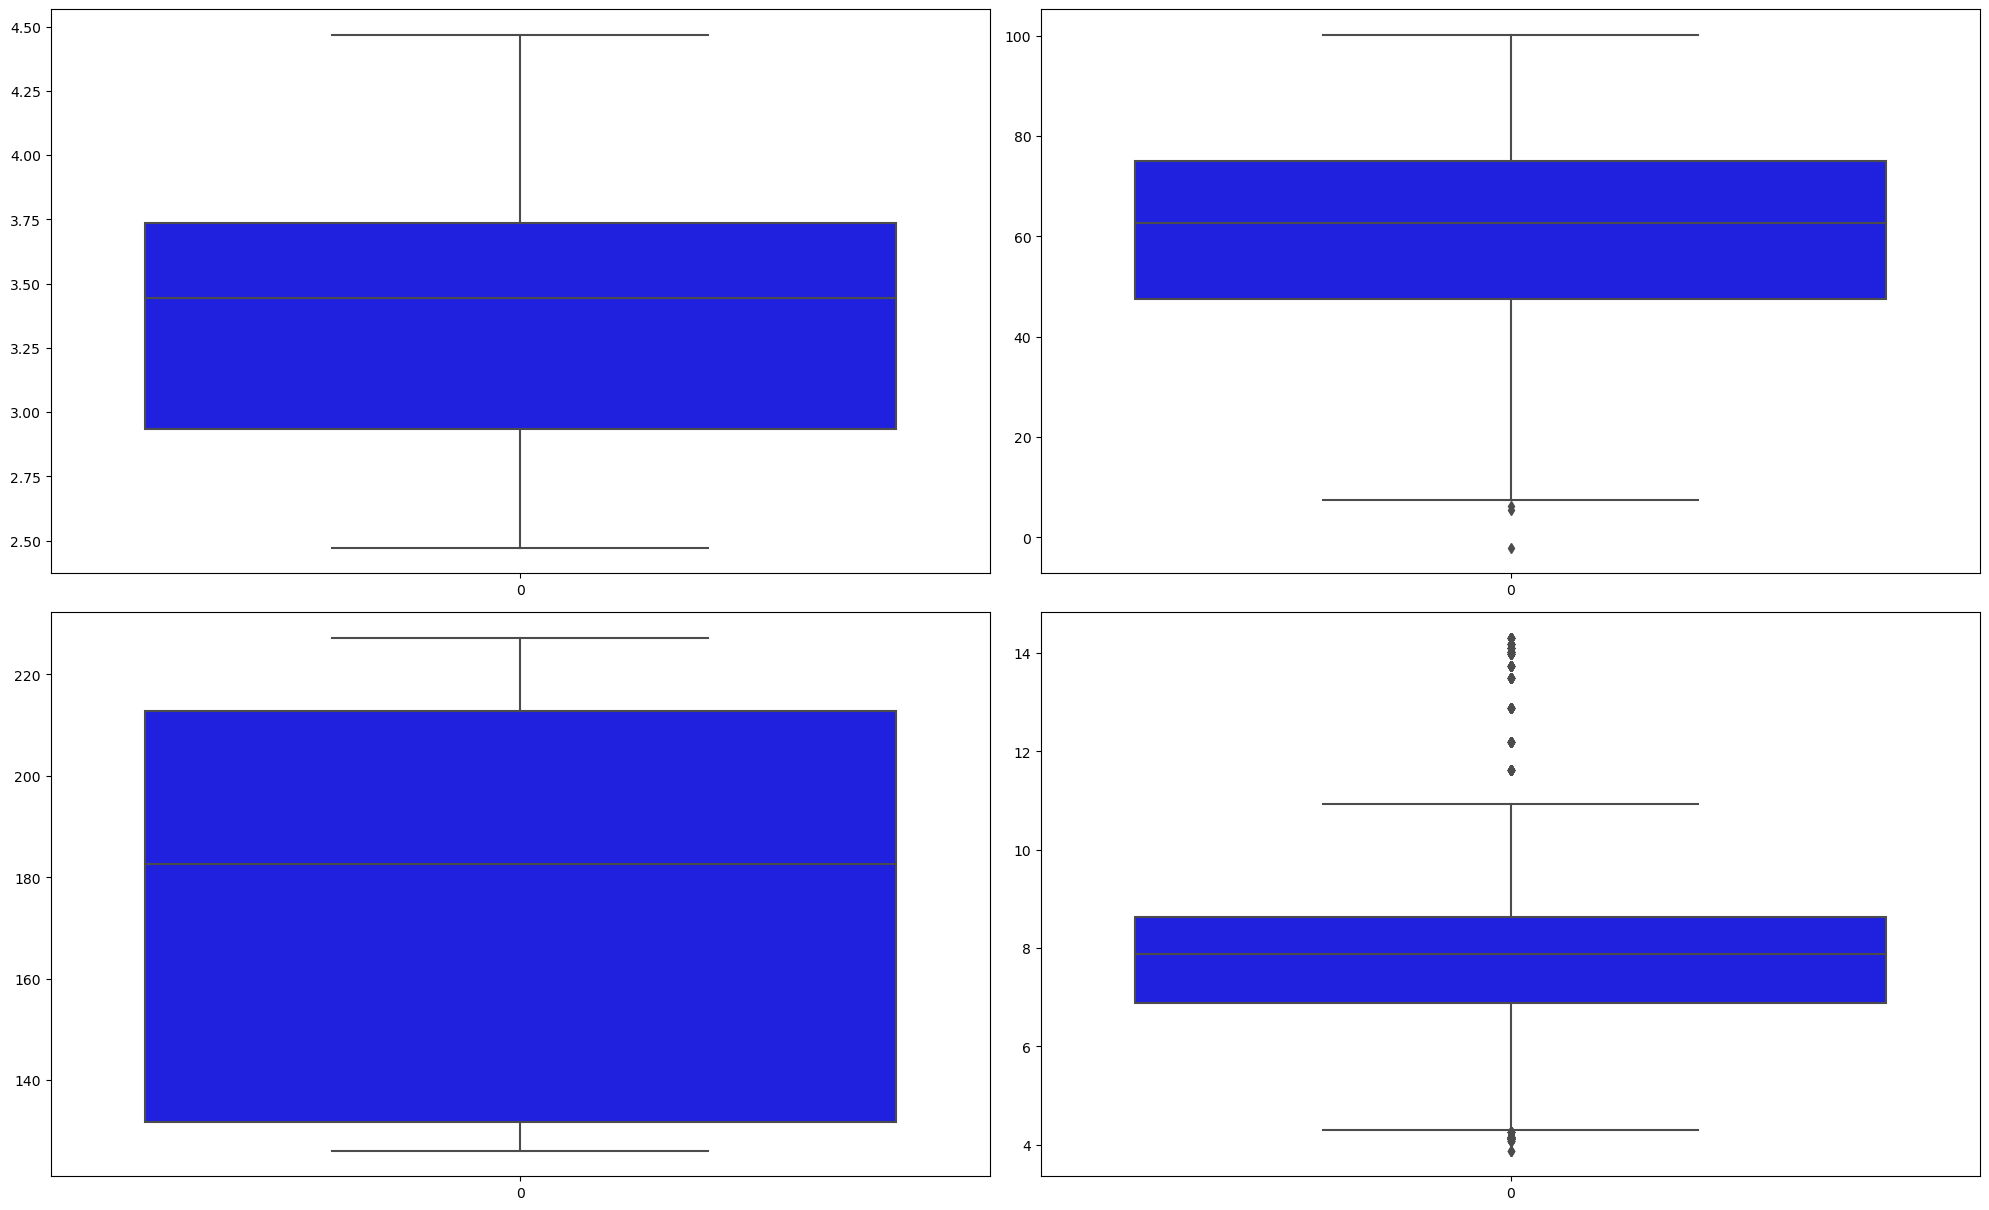

Number of data rows: 6435


In [56]:
cols = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']
plt.figure(figsize=(20, 18))

for i, col in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data_copy[col], color='blue')

plt.tight_layout()

# Save the figure as a PNG image with a transparent background
plt.savefig('boxplot_transparent_background.png', transparent=True)

plt.show()

print('Number of data rows:', data_copy.shape[0])

In [ ]:
# Remove outliers from the temperature column
data_copy.drop(data_copy[data_copy['Temperature'] < 7].index, axis = 0, inplace = True)

# Remove outliers from the unemployment column
data_copy.drop(data_copy[data_copy['Unemployment'] < 4.4].index, axis = 0, inplace = True)
data_copy.drop(data_copy[data_copy['Unemployment'] > 11].index, axis = 0, inplace = True)

In [ ]:
# Number of Rows after removing outliers
print('Number of data rows: ', data_copy.shape[0])

Number of data rows:  5938


### Splitting The Data To Training And Testing Data

In [ ]:
# Splitting data for train and test
X = data_copy.drop('Weekly_Sales', axis = 1)
y = data_copy['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# For explaining the byfercation of data for training and testing
print('Shape of data      : ', X.shape)
print('Shape of train data: ', X_train.shape)
print('Shape of test data : ', X_test.shape)

Shape of data      :  (5938, 13)
Shape of train data:  (4750, 13)
Shape of test data :  (1188, 13)


In [ ]:
# Splitting the data into Numerical Features and Categorical Features
num_features = data_copy.select_dtypes('number').columns.to_list()
num_features.remove('Weekly_Sales')

cat_features = data_copy.select_dtypes('object').columns.to_list()

print(f'Numerical Features : {num_features}')
print(f'Categorical Features: {cat_features}')

Numerical Features : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week']
Categorical Features: ['Store', 'Holiday_Flag', 'season', 'month_name', 'week']


In [ ]:
# data transformation pipeline
preprocessor = ColumnTransformer([
                                  ('num_features', StandardScaler(), num_features),
                                  ('cat_features', BinaryEncoder(), cat_features),
                                ])

# Fitting the training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 ['Temperature', 'Fuel_Price', 'CPI',
                                  'Unemployment', 'Year', 'Month', 'Week']),
                                ('cat_features', BinaryEncoder(),
                                 ['Store', 'Holiday_Flag', 'season',
                                  'month_name', 'week'])])

In [ ]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
# Linear Regression Model
LR = LinearRegression()

# Fitting the data
LR.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
# Function to distribute 
def Distribution_Plot(estimator, Training_Testing, X, y, Title):

    """This function is used to perform some model evaluation using training and testing data \
    by plotting the distribution of the actual and predicted values of the training or testing data."""

    # Y predict of X train or X test
    yhat = estimator.predict(X)

    plt.figure(figsize=(14, 6))
    ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
    ax2 = sns.distplot(yhat, hist = False, color = "r", label = f'Predicted Values ({Training_Testing})', ax = ax1)
    plt.title(Title, size = 18)
    plt.legend()
    plt.show()

/var/folders/j7/xwjqw5s538sc5lrjg_1p04bm0000gn/T/ipykernel_17211/2545071257.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/j7/xwjqw5s538sc5lrjg_1p04bm0000gn/T/ipykernel_17211/2545071257.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




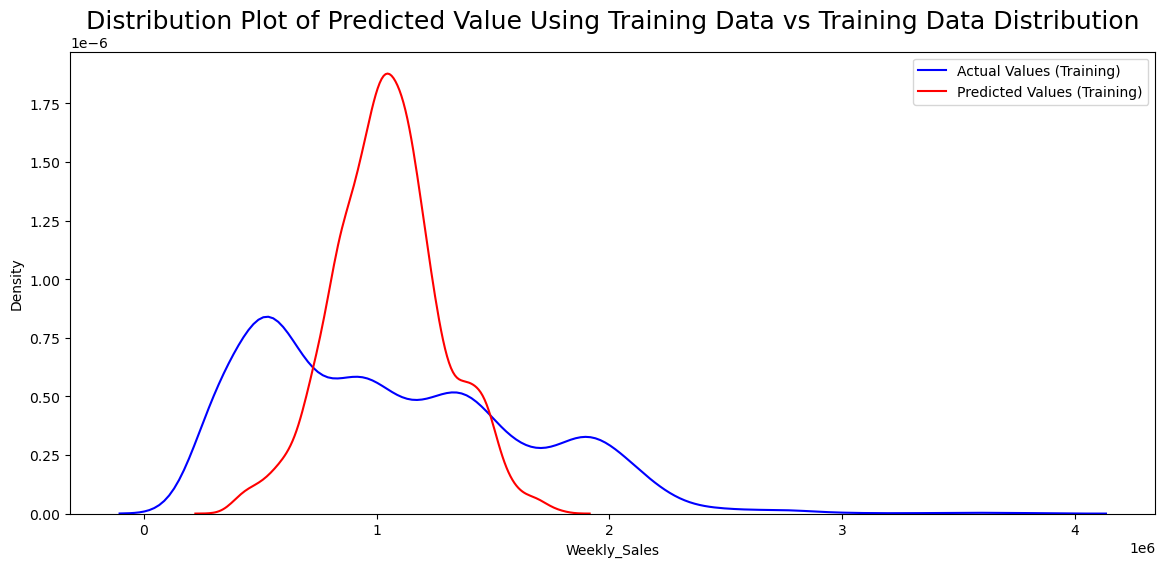

In [ ]:
# Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'

Distribution_Plot(LR, 'Training', X_train_transformed, y_train, Title)

In [ ]:
# To evaluate the model
def model_evaluation(estimator, Training_Testing, X, y):

    ''' This function is used to evaluate the model through RMSE and R2'''

    # Y predict of X train or X test
    predict_data = estimator.predict(X)

    print(f'{Training_Testing} Accuracy: \n')
    print(f'-> Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y, predict_data)), 2)}')
    print(f'-> R-Squere score Training: {round(r2_score(y, predict_data) * 100, 2)} % \n')

In [ ]:
# Training Accuracy
model_evaluation(LR, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 520814.2
-> R-Squere score Training: 16.51 % 



In [ ]:
# Parameter tuning
def hyperparameter_tunning(estimator, X_train, y_train, param_grid, score = 'rarm2', n = 5):

    '''This function is used to find the best set of hyperparameters for the model to optimize its performance'''


    # Perform grid search
    grid_search = GridSearchCV(estimator = estimator,
                               param_grid = param_grid,
                               scoring = score,
                               cv = n)

    # Fit the data
    grid_search.fit(X_train,y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best parameters and score
    print(f'Best parameters: {best_params} \n')
    print(f'Best score: {best_score}')

    # best estimator
    best_estimator = grid_search.best_estimator_

    return best_estimator

In [ ]:
# Polynomial Regression Model
LR_pipe = Pipeline([('poly_feat', PolynomialFeatures()),
                    ('lin_reg', LinearRegression())])

# Define the parameter grid to search
param_grid = {'poly_feat__degree': [2, 3, 4]}

best_estimator = hyperparameter_tunning(LR_pipe, X_train_transformed, y_train, param_grid, score = 'r2', n = 5)

Best parameters: {'poly_feat__degree': 3} 

Best score: 0.9589108097817126


In [ ]:
# Linear Regression Model after tuning
poly_reg = best_estimator

In [ ]:
# Training Accuracy Afer tuning
model_evaluation(poly_reg, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 59489.49
-> R-Squere score Training: 98.91 % 



/var/folders/j7/xwjqw5s538sc5lrjg_1p04bm0000gn/T/ipykernel_17211/2545071257.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/j7/xwjqw5s538sc5lrjg_1p04bm0000gn/T/ipykernel_17211/2545071257.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




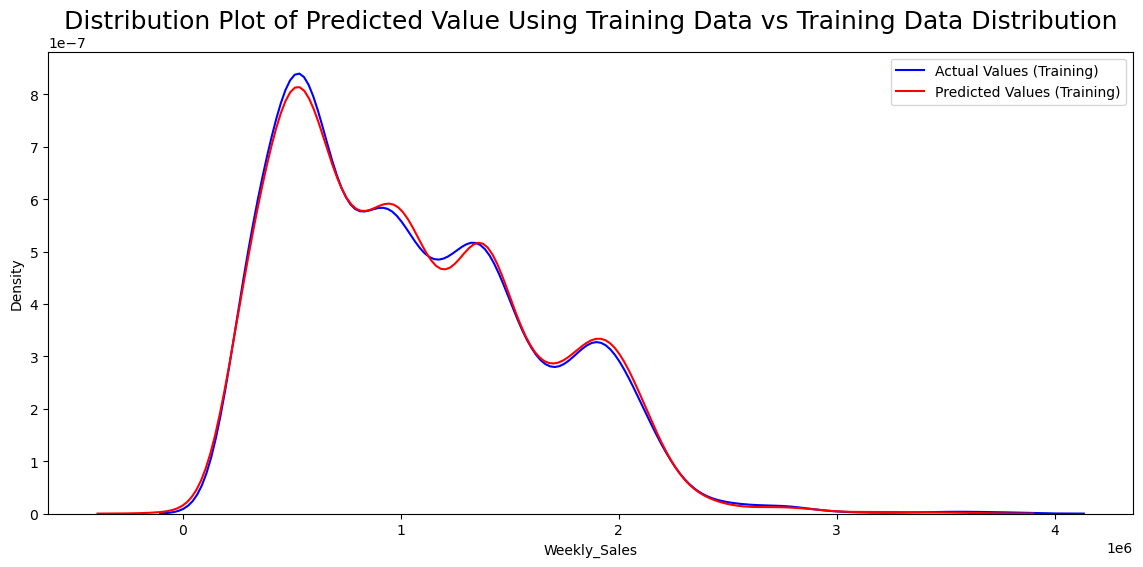

In [ ]:
# Figure 2: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(poly_reg, 'Training', X_train_transformed, y_train, Title)